# This notebook will serve for the initial EDA for the listings data for the TFW project

In [137]:
# Import necassary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
# Load the dataset
df_listings = pd.read_csv('../data/listings_20210707.csv')

In [260]:
# Shape of the dataset
print('The dataset contains %s different accommodations and %s features' %(df_listings.shape[0], df_listings.shape[1]))

The dataset contains 30269 different accommodations and 45 features


In [141]:
# Have a first look at the dataset
df_listings.head()

,listing_id,customer_id,state,contract_end,zip,country_title,region,subregion,holiday_region,property_type,...,sauna,grill,garden,terrace,balcony,bathrooms,bedrooms,max_guests,pets,living_area
0,97232bc1-cee6-54cc-9965-be13177051d3,6e5e6ab0-34d3-5662-9259-7ae7eb021acb,Online,2022-05-01,182--,Deutschland,Ostsee,Mecklenburgische Ostseeküste,Ostsee,holiday_apartment,...,yes,yes,yes,no,yes,1.0,2.0,4.0,0.0,60
1,b2e43b01-0a74-5270-95db-e4f649982e72,6e5e6ab0-34d3-5662-9259-7ae7eb021acb,Online,2022-05-01,875--,Deutschland,Allgäu,Oberallgäu,Oberallgäu,holiday_apartment,...,yes,yes,yes,no,yes,1.0,1.0,4.0,0.0,50
2,892f4fda-e0e8-5a9b-bbed-29f82942ff9a,6e5e6ab0-34d3-5662-9259-7ae7eb021acb,Online,2022-05-01,237--,Deutschland,Ostsee,Lübecker Bucht,Ostsee,holiday_apartment,...,yes,yes,yes,yes,no,1.0,2.0,6.0,0.0,77
3,e190ea0f-c688-5aa8-ae38-d0aeebdeec65,6e5e6ab0-34d3-5662-9259-7ae7eb021acb,Online,2022-05-01,274--,Deutschland,Nordsee,Cuxhaven & Umgebung,Nordsee,holiday_apartment,...,yes,yes,yes,no,yes,1.0,2.0,6.0,0.0,80
4,67e29a5f-1299-535c-ab06-d5c3ae750e9f,350d46c1-2a43-5053-a33c-40cd3a4c8b95,Online,2022-04-01,243--,Deutschland,Ostsee,Geltinger Bucht,Ostsee,holiday_apartment,...,yes,yes,yes,yes,no,1.0,2.0,4.0,0.0,60


In [143]:
# First look at the info
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30269 entries, 0 to 30268
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_id                      30269 non-null  object 
 1   customer_id                     30269 non-null  object 
 2   state                           30269 non-null  object 
 3   contract_end                    30269 non-null  object 
 4   zip                             30269 non-null  object 
 5   country_title                   30269 non-null  object 
 6   region                          30269 non-null  object 
 7   subregion                       30268 non-null  object 
 8   holiday_region                  30269 non-null  object 
 9   property_type                   30269 non-null  object 
 10  subscription                    30269 non-null  object 
 11  binding_inquiry                 30269 non-null  object 
 12  option_allergic                 

In [145]:
# First describtion of the numerical features
df_listings.describe()

,bathrooms,bedrooms,max_guests,pets
count,29839.000000,29839.000000,29839.000000,29839.0
mean,1.124971,1.503234,4.427963,0.0
std,0.467131,0.921612,2.452340,0.0
min,0.000000,0.000000,1.000000,0.0
25%,1.000000,1.000000,3.000000,0.0
50%,1.000000,1.000000,4.000000,0.0
75%,1.000000,2.000000,5.000000,0.0
max,14.000000,17.000000,70.000000,0.0


In [147]:
# Looking for categorical features
df_listings.nunique()

listing_id                        30269
customer_id                       19835
state                                 3
contract_end                         78
zip                                 302
country_title                         1
region                               29
subregion                           196
holiday_region                       29
property_type                        25
subscription                          2
binding_inquiry                       2
option_allergic                       4
option_non_smoking_only               4
option_holiday_with_your_pet          4
option_holiday_with_your_horse        4
option_holiday_with_your_dog          4
option_close_to_the_beach             3
option_railway_station                2
option_airport                        2
option_wheelchair_accessible          3
option_family_travel                  4
option_close_to_the_water             3
option_holiday_with_your_baby         4
option_long_term_holiday              4


The dataset contains many categorical features that we need to process further.

## First cleaning steps

Like Traum-Ferienwohnungen told, we've got a dataset with accomodations located in Germany as we can see in the feature country_title. Because of this, we can drop this column.

In [149]:
# Drop the column country_title
df_listings = df_listings.drop('country_title', axis=1)

The feature `pets` includes only missing values and zeros. In my opinion, this column records the number of pets that are allowed. If pets are allowed or not (or on request) are covered in following columns: `option_holiday_with_your_pet`, `option_holiday_with_your_horse`, `option_holiday_with_your_dog`. For this reason, we decided to drop this column too.

In [151]:
# Drop the column pets
print(df_listings.pets.unique())
df_listings = df_listings.drop('pets', axis=1)

[ 0. nan]


## Feature converting

First, convert the date feature contract_end to datetime.

In [153]:
# Convert column contract_end to datetime
df_listings['contract_end'] = pd.to_datetime(df_listings['contract_end'])

The feature `living_area` contains values with range. Like Traum-Ferienwohnungen recommends, we take the first number as correct one and convert them to integers.

In [155]:
# Replace range of `living_area` with the first number
df_listings.replace(['70-280', '50-100', '50-70', '24-49', '16 - 26', '70-280', '18 - 26', '88-100', '46-73', '50-80', '52-65', '50-60'], ['70', '50', '50', '24', '16', '70', '18', '88', '46', '50', '52', '50'], inplace=True)

In [157]:
# Convert column `living_area`to integer
df_listings['living_area'] = df_listings['living_area'].astype(float)

To use the option features in the model, we convert the booleans / categories to integers as following:

- False / no / Not allowed >> 0
- True / yes / Allowed >> 1
- On request >> 2
- Unset >> 3

In [159]:
# Replacement to integers 
df_listings.replace(['False', 'no', 'not allowed', 'True', 'yes', 'allowed', 'on request', 'unset'], [0, 0, 0, 1, 1, 1, 2, 3], inplace=True)

## Looking for correlations

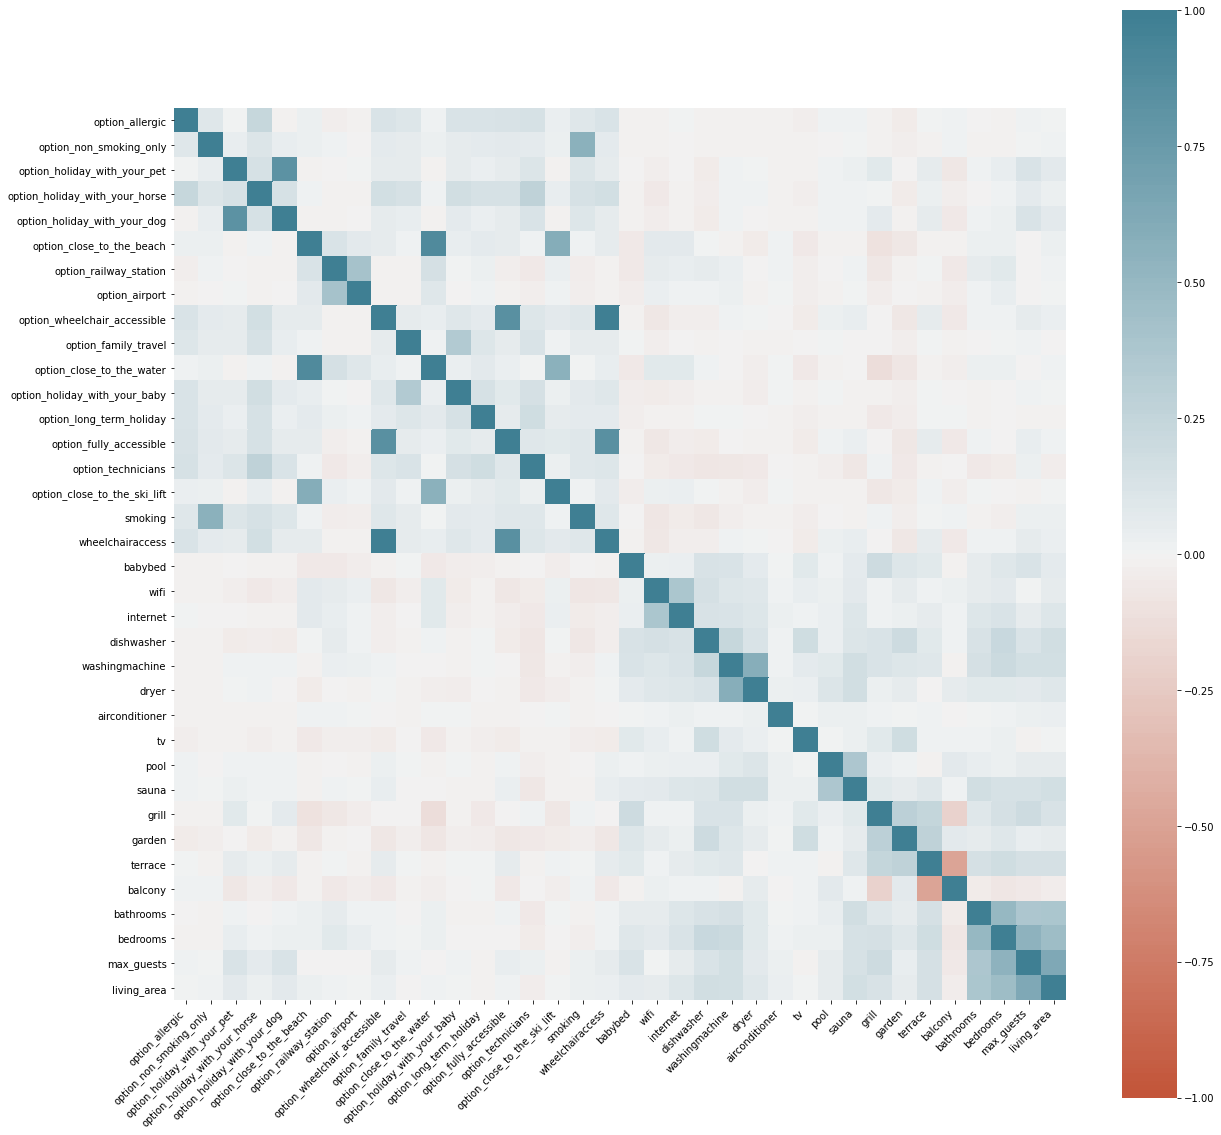

In [161]:
# generate the heatmap
corr = df_listings.corr()
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [163]:
# Generate table with correlations 
corr.style.background_gradient(cmap='coolwarm')

,option_allergic,option_non_smoking_only,option_holiday_with_your_pet,option_holiday_with_your_horse,option_holiday_with_your_dog,option_close_to_the_beach,option_railway_station,option_airport,option_wheelchair_accessible,option_family_travel,option_close_to_the_water,option_holiday_with_your_baby,option_long_term_holiday,option_fully_accessible,option_technicians,option_close_to_the_ski_lift,smoking,wheelchairaccess,babybed,wifi,internet,dishwasher,washingmachine,dryer,airconditioner,tv,pool,sauna,grill,garden,terrace,balcony,bathrooms,bedrooms,max_guests,living_area
option_allergic,1.000000,0.101161,0.004128,0.227050,-0.015263,0.030383,-0.024078,-0.018192,0.132091,0.101872,0.016305,0.120809,0.127983,0.139634,0.146624,0.037823,0.088802,0.132091,-0.018304,-0.020945,0.003857,-0.015154,-0.014286,-0.010603,-0.011778,-0.030187,0.017280,0.011424,-0.013179,-0.043089,0.003432,0.012568,-0.007142,-0.011288,0.016597,0.000811
option_non_smoking_only,0.101161,1.000000,0.041090,0.112182,0.039284,0.027046,0.008467,-0.007738,0.063741,0.051407,0.026072,0.058642,0.067127,0.073159,0.067330,0.026413,0.567786,0.063741,-0.014780,-0.022077,-0.001288,-0.021874,-0.013559,-0.008407,-0.008573,-0.018092,-0.005840,0.004619,-0.022206,-0.029938,-0.011839,0.014031,-0.008902,-0.008774,0.002915,0.014255
option_holiday_with_your_pet,0.004128,0.041090,1.000000,0.141271,0.821877,-0.019797,-0.001050,0.001434,0.052508,0.049383,-0.020168,0.059030,0.033842,0.049312,0.116757,-0.022882,0.110126,0.052508,-0.000314,-0.026420,-0.002015,-0.041188,0.021625,0.000611,-0.009589,-0.015356,0.012991,0.028691,0.083433,-0.007776,0.061947,-0.066268,0.018413,0.044567,0.119571,0.075089
option_holiday_with_your_horse,0.227050,0.112182,0.141271,1.000000,0.147950,0.019766,-0.022763,-0.012314,0.166429,0.142210,0.017917,0.172579,0.143726,0.147914,0.280355,0.045781,0.140681,0.166429,-0.013056,-0.055524,-0.014800,-0.033757,0.014005,0.014136,-0.011933,-0.029104,0.014050,0.015239,0.005745,-0.041073,0.024963,-0.024914,-0.002313,0.008116,0.068145,0.027554
option_holiday_with_your_dog,-0.015263,0.039284,0.821877,0.147950,1.000000,-0.011998,-0.014517,-0.002691,0.059398,0.042429,-0.015896,0.068638,0.034261,0.047399,0.119383,-0.019975,0.105035,0.059398,-0.009673,-0.034239,-0.013231,-0.046492,0.014673,-0.001444,-0.008119,-0.015188,0.012671,0.023021,0.069166,-0.015689,0.049820,-0.053404,0.008471,0.030503,0.118335,0.070441
option_close_to_the_beach,0.030383,0.027046,-0.019797,0.019766,-0.011998,1.000000,0.127434,0.073195,0.054826,0.021376,0.883133,0.040279,0.067301,0.051591,0.012209,0.586346,0.007843,0.054826,-0.058593,0.072958,0.076245,0.006089,-0.013147,-0.039151,0.010011,-0.052639,-0.016171,-0.010174,-0.101491,-0.068127,-0.009112,-0.019757,0.026233,0.025459,-0.002346,0.024971
option_railway_station,-0.024078,0.008467,-0.001050,-0.022763,-0.014517,0.127434,1.000000,0.408525,-0.018754,-0.013979,0.155613,0.000020,0.024426,-0.024444,-0.055829,0.035517,-0.037998,-0.018754,-0.053409,0.058404,0.042691,0.046917,0.035227,-0.006616,0.008114,-0.024815,-0.002319,0.021445,-0.067190,-0.019328,0.003128,-0.049691,0.047155,0.078349,-0.007093,0.018065
option_airport,-0.018192,-0.007738,0.001434,-0.012314,-0.002691,0.073195,0.408525,1.000000,-0.009617,-0.009700,0.096944,-0.002095,0.014858,-0.020108,-0.023509,0.022899,-0.024388,-0.009617,-0.034500,0.032201,0.015689,0.022101,0.023602,-0.014344,0.003780,-0.025336,-0.010119,0.006959,-0.033204,-0.005923,-0.009727,-0.031828,0.021407,0.043067,-0.005920,0.004381
option_wheelchair_accessible,0.132091,0.063741,0.052508,0.166429,0.059398,0.054826,-0.018754,-0.009617,1.000000,0.050452,0.041542,0.086460,0.067581,0.838437,0.106250,0.074523,0.091266,1.000000,-0.010488,-0.065034,-0.026216,-0.030359,0.008601,0.002719,-0.004838,-0.045726,0.025347,0.044819,-0.004355,-0.070255,0.055723,-0.051206,0.014784,0.010496,0.057494,0.031679
option_family_travel,0.101872,0.051407,0.049383,0.142210,0.042429,0.021376,-0.013979,-0.009700,0.050452,1.000000,0.018014,0.344572,0.104708,0.057853,0.129510

## Plotting distribution of the features

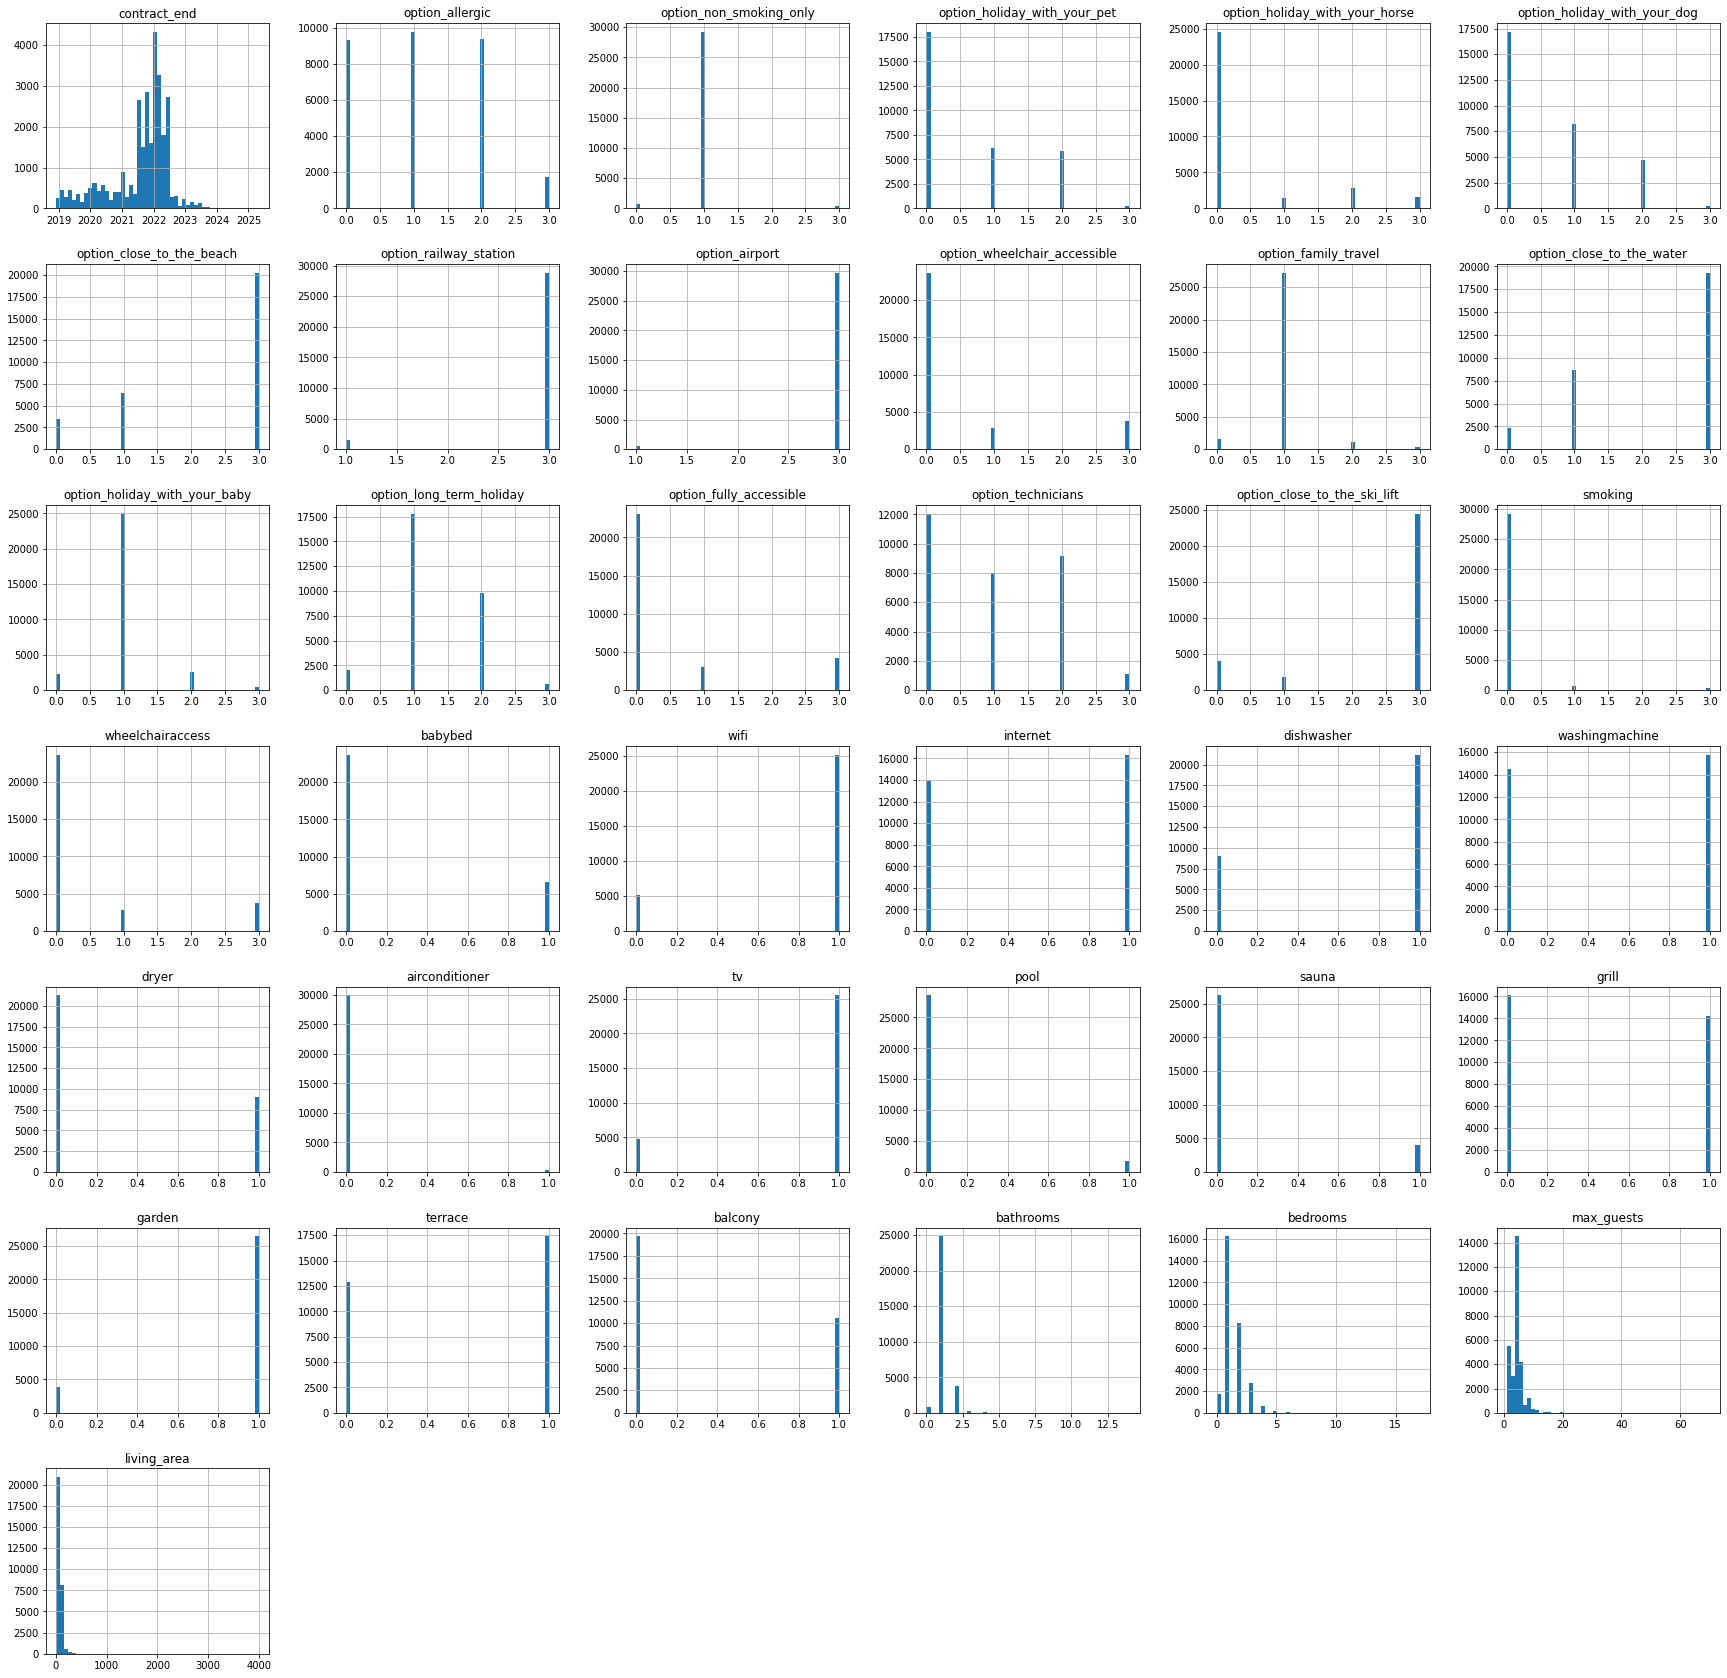

In [199]:
# Plotting histograms of numerical features 
df_listings.hist(bins=50, figsize = (30,30))
plt.show()

### Closer Look: categorical features

1. The histograms of the features `option_wheelchair_accessible` and `wheelchairaccess` look very similar. A check confirmed identical columns. For this reason we drop one column.

In [207]:
# Check for identical columns 
comparison_column = np.where(df_listings["option_wheelchair_accessible"] == df_listings["wheelchairaccess"], True, False)
print(np.all(comparison_column))

True


In [208]:
# Drop the column wheelchairaccess
df_listings = df_listings.drop('wheelchairaccess', axis=1)

2. The histograms of features `option_non_smoking_only` and `smoking` look contrary. A check confirmed contrary True / False values. For this reason we drop one column. We decided to drop the column `smoking` because the column `option_non_smoking_only` differentiate the unset and on request values.

In [254]:
# Count values for categories
print('option_non_smoking_only:\n', df_listings['option_non_smoking_only'].value_counts())
print('smoking:\n',df_listings['smoking'].value_counts())

option_non_smoking_only:
 1    29225
0      648
3      395
2        1
Name: option_non_smoking_only, dtype: int64
smoking:
 0    29225
1      648
3      396
Name: smoking, dtype: int64


In [229]:
# Create a sub dataset that contains only True / False values for the columns
smoking = df_listings.query("option_non_smoking_only == [0 ,1] & smoking == [1, 0]")

In [230]:
# Check for contrary columns 
comparison_column_smoking = np.where(smoking["option_non_smoking_only"] != smoking["smoking"], True, False)
print(np.all(comparison_column_smoking))

True


In [255]:
# Drop the column wheelchairaccess
df_listings = df_listings.drop('smoking', axis=1)

3. The histograms of features `close_to_the_beach` and `close_to_the_water` look very similar. All accommodations close to the beach are close to the water too. But because the differences between close to the water and close to the beach, like a dike, a habour or a lake are important for guests, we stay with both features.


4. For the features `close_to_the_beach`, `close_to_the_water`, `option_close_to_the_skilift`, `option_railway_station` and `option_airport` the amount of unset values is high: 

In [273]:
# Calculate amount of unset values
print('Percent of unset values in feature')
print('Beach nearby:', round(df_listings.query('option_close_to_the_beach == 3').count()[1]/df_listings.shape[0]*100, 1))
print('Water nearby:', round(df_listings.query('option_close_to_the_water == 3').count()[1]/df_listings.shape[0]*100, 1))
print('Ski lift nearby:', round(df_listings.query('option_close_to_the_ski_lift == 3').count()[1]/df_listings.shape[0]*100, 1))
print('Railway station:', round(df_listings.query('option_railway_station == 3').count()[1]/df_listings.shape[0]*100, 1))
print('Airport:', round(df_listings.query('option_airport == 3').count()[1]/df_listings.shape[0]*100, 1))

Percent of unset values in feature
Beach nearby: 67.0
Water nearby: 63.8
Ski lift nearby: 80.7
Railway station: 95.2
Airport: 98.2


# What do we want to do with the features?

### Closer Look: numerical features

In [284]:
# Missing values
print('Missing values')
print('Bathrooms:', df_listings.bathrooms.isna().sum())
print('Bedrooms:', df_listings.bedrooms.isna().sum())
print('Maximum guests:', df_listings.max_guests.isna().sum())
print('Living area:', df_listings.living_area.isna().sum())

Missing values
Bathrooms: 430
Bedrooms: 430
Maximum guests: 430
Living area: 432


#### Bathrooms

In [231]:
df_listings.bathrooms.describe()

count    29839.000000
mean         1.124971
std          0.467131
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         14.000000
Name: bathrooms, dtype: float64

In [232]:
df_listings.groupby('bathrooms')['listing_id'].count()

bathrooms
0.0       886
1.0     24817
2.0      3787
3.0       269
4.0        57
5.0        12
6.0         7
8.0         2
10.0        1
14.0        1
Name: listing_id, dtype: int64

In [233]:
df_listings.groupby('bathrooms').median()

,option_allergic,option_non_smoking_only,option_holiday_with_your_pet,option_holiday_with_your_horse,option_holiday_with_your_dog,option_close_to_the_beach,option_railway_station,option_airport,option_wheelchair_accessible,option_family_travel,...,tv,pool,sauna,grill,garden,terrace,balcony,bedrooms,max_guests,living_area
bathrooms,,,,,,,,,,,,,,,,,,,,,
0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,3.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,61.5
1.0,1.0,1.0,0.0,0.0,0.0,3.0,3.0,3.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,4.0,62.0
2.0,1.0,1.0,0.0,0.0,0.0,3.0,3.0,3.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,6.0,105.0
3.0,1.0,1.0,0.0,0.0,0.0,3.0,3.0,3.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,8.0,150.0
4.0,1.0,1.0,1.0,0.0,1.0,3.0,3.0,3.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,12.0,226.5
5.0,1.0,1.0,2.0,0.0,1.0,3.0,3.0,3.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,6.0,16.0,300.0
6.0,1.0,1.0,0.0,0.0,0.0,3.0,3.0,3.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,5.0,20.0,335.0
8.0,2.5,1.0,2.0,2.5,1.0,3.0,3.0,3.0,1.5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.5,21.5,525.0
10.0,2.0,1.0,1.0,0.0,1.0,3.0,3.0,3.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,9.0,27.0,500.0


In [234]:
df_listings.query('bathrooms == 5')

,listing_id,customer_id,state,contract_end,zip,region,subregion,holiday_region,property_type,subscription,...,pool,sauna,grill,garden,terrace,balcony,bathrooms,bedrooms,max_guests,living_area
22,ab860ab1-420a-5e67-9fd7-89de7d6ddd93,fd45ee2d-dd9e-5f26-a2bc-8f2fc5e59f28,Offline,2019-01-01,258--,Nordsee,Nordfriesland,Nordfriesland,villa,active,...,1,0,1,1,1,1,5.0,4.0,9.0,300.0
5998,c9620e3d-362c-5a57-beef-e1f1fd37bc25,85310491-ad4c-5bbc-aa10-526e0c68280f,Online,2021-10-01,264--,Nordsee,Wangerland,Nordsee,holiday_houses,active,...,0,0,1,1,1,0,5.0,6.0,13.0,250.0
6221,fa712a15-37eb-5314-8cc3-b5a3aefec905,41b3be68-e7cc-5f3d-82e8-b3286514a02e,Online,2021-11-01,986--,Thüringer Wald,Rennsteig,Thüringer Wald,holiday_houses,active,...,0,1,0,1,1,1,5.0,7.0,24.0,150.0
9853,7695429a-23c5-5382-a33e-3d60f7fc47d0,817502c6-b0ca-55ff-b456-16b623df466c,Online,2022-01-01,837--,Oberbayern,Tegernsee-Schliersee,Oberbayern,cottage,active,...,0,1,1,1,1,1,5.0,5.0,12.0,340.0
14222,181ceb7b-14a4-5b78-8f30-106ca3575bfd,52b73c0b-c7cc-58c0-bd5d-2a7eb5fc9915,Online,2022-03-01,875--,Allgäu,Oberallgäu,Oberallgäu,holiday_apartment,active,...,0,1,0,1,1,1,5.0,7.0,18.0,240.0
20879,3893c996-38dc-5795-91ea-a263fe1ac616,2cbebedb-c3f2-59dc-823e-cd48bb737285,Online,2022-03-01,264--,Nordsee,Ostfriesland,Nordsee,holiday_houses,active,...,0,0,0,1,1,0,5.0,5.0,14.0,150.0
25331,b8d79b13-e005-5561-9ac7-9c5e1c7b4267,8201fddd-2c86-5f4f-b873-0e781d5e9554,Online,2022-06-01,942--,Ostbayern,Bayerischer Wald,Bayerischer Wald,holiday_houses,active,...,0,0,1,1,1,1,5.0,6.0,25.0,350.0
26692,6a33e7c0-18da-5fd9-8e30-cb5d88ebb58c,51493079-398d-5ed5-bde9-8107e4e7ff83,Online,2022-06-01,258--,Nordsee,Halbinsel Eiderstedt,Nordsee,holiday_houses,active,...,1,1,0,1,1,0,5.0,8.0,16.0,260.0
26957,0ccc6d3e-efbb-56b6-9c95-1fe75728bbb2,f17ddbfb-c969-5800-8dd7-3fc00013f239,Offline,2021-06-01,599--,Sauerland,Hochsauerland,Sauerland,holiday_houses,active,...,0,1,1,1,1,1,5.0,4.0,20.0,350.0
27357,a082acc8-d9d1-5631-a06b-0b30b4f5b207,5973c010-6f90-5aa7-baff-f6e220775668,Online,2021-12-01,237--,Ostsee,Fehmarn,Ostsee,holiday_houses,active,...,0,0,1,1,0,0,5.0,6.0,15.0,300.0


In [235]:
df_listings.query('bathrooms == 6')

,listing_id,customer_id,state,contract_end,zip,region,subregion,holiday_region,property_type,subscription,...,pool,sauna,grill,garden,terrace,balcony,bathrooms,bedrooms,max_guests,living_area
117,cf8a4498-c1ff-50fb-8a44-162fbce7486e,9ce45447-5317-5ffe-9446-cd86180aaf56,Offline,2019-01-01,387--,Harz,Brockengebiet,Harz,holiday_houses,active,...,1,0,1,1,1,1,6.0,11.0,30.0,400.0
935,beb27d8e-f43e-5b6c-8186-f65e9824e7ba,b0ed15bf-253d-5384-a926-b52e7a902240,Deaktiviert,2019-05-01,798--,Schwarzwald,Südschwarzwald,Schwarzwald,holiday_houses,active,...,1,1,1,1,1,1,6.0,5.0,16.0,570.0
7724,73b08308-f463-551d-bdb1-7d8f1bc32aaa,8957b6dc-bf16-538f-a85c-b63f5436bd7b,Online,2021-10-01,273--,Lüneburger Heide,Westheide,Lüneburger Heide,holiday_houses,active,...,0,0,1,1,1,1,6.0,8.0,32.0,335.0
12173,975136dd-94b7-5092-b27b-94cb0ab3c817,bbb7b590-fe86-524a-b678-5b99efd0fec7,Offline,2021-08-01,535--,Eifel,Hocheifel,Eifel,guestroom,active,...,0,1,1,1,1,1,6.0,4.0,12.0,120.0
13062,af77aaa3-b3a7-5ffd-b176-c0ac97b9751d,cb20ad32-1a1e-532b-8193-b006a286668c,Online,2022-03-01,941--,Ostbayern,Bayerischer Wald,Bayerischer Wald,holiday_houses,active,...,1,1,1,1,1,0,6.0,9.0,22.0,320.0
17888,e491be55-3906-51f2-afa3-5c61cd5ebc39,9a36080c-b866-5ea2-8a5b-85abef62829c,Online,2022-05-01,798--,Schwarzwald,Südschwarzwald,Schwarzwald,holiday_houses,active,...,0,1,0,1,1,0,6.0,5.0,20.0,570.0
29300,fa60902b-5981-52e4-8e6f-50f04e2706bc,0ab200d8-3a66-5fc8-8ced-88fff8446f22,Online,2022-01-01,985--,Thüringer Wald,Rennsteig,Thüringer Wald,holiday_apartment,active,...,0,0,0,1,1,0,6.0,5.0,12.0,80.0


In [236]:
df_listings.query('bathrooms == 8')

,listing_id,customer_id,state,contract_end,zip,region,subregion,holiday_region,property_type,subscription,...,pool,sauna,grill,garden,terrace,balcony,bathrooms,bedrooms,max_guests,living_area
8367,488f01b5-4331-5e9c-b888-568c1fd5d595,2ef664b9-e6e3-5fac-8edc-f2636dccfce6,Online,2022-01-01,833--,Oberbayern,Chiemgau,Oberbayern,cottage,active,...,0,0,0,0,0,0,8.0,12.0,25.0,600.0
15153,57bf37b2-8761-56e9-905d-d52c179201f0,1fba3b7a-18ad-52fd-b415-99cd1397474c,Online,2022-04-01,258--,Nordsee,Nordfriesland,Nordfriesland,holiday_houses,active,...,0,0,0,0,0,0,8.0,9.0,18.0,450.0


In [237]:
df_listings.query('bathrooms == 10')

,listing_id,customer_id,state,contract_end,zip,region,subregion,holiday_region,property_type,subscription,...,pool,sauna,grill,garden,terrace,balcony,bathrooms,bedrooms,max_guests,living_area
14401,cb81a428-236e-5ece-aeaf-bffe841acabb,eef7b157-1efb-5c61-9762-fea8a78333b1,Online,2022-05-01,386--,Harz,Nordharz,Harz,holiday_houses,active,...,0,0,1,1,1,0,10.0,9.0,27.0,500.0


In [238]:
df_listings.query('bathrooms == 14')

,listing_id,customer_id,state,contract_end,zip,region,subregion,holiday_region,property_type,subscription,...,pool,sauna,grill,garden,terrace,balcony,bathrooms,bedrooms,max_guests,living_area
5451,d57a3cb8-94f2-50a5-948f-3d9848494a67,03a687ec-25ef-5a02-8e97-f2555133872a,Offline,2020-06-01,173--,Ostsee,Vorpommern,Ostsee,castle,inactive,...,1,1,1,1,1,0,14.0,17.0,33.0,1500.0


## Bedrooms

In [239]:
df_listings.bedrooms.describe()

count    29839.000000
mean         1.503234
std          0.921612
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         17.000000
Name: bedrooms, dtype: float64

In [240]:
df_listings.groupby('bedrooms')['listing_id'].count()

bedrooms
0.0      1767
1.0     16222
2.0      8231
3.0      2749
4.0       627
5.0       148
6.0        47
7.0        27
8.0        10
9.0         4
11.0        4
12.0        1
16.0        1
17.0        1
Name: listing_id, dtype: int64

In [241]:
df_listings.groupby('bedrooms').median()

,option_allergic,option_non_smoking_only,option_holiday_with_your_pet,option_holiday_with_your_horse,option_holiday_with_your_dog,option_close_to_the_beach,option_railway_station,option_airport,option_wheelchair_accessible,option_family_travel,...,tv,pool,sauna,grill,garden,terrace,balcony,bathrooms,max_guests,living_area
bedrooms,,,,,,,,,,,,,,,,,,,,,
0.0,1.0,1.0,0.0,0.0,0.0,3.0,3.0,3.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,36.0
1.0,1.0,1.0,0.0,0.0,0.0,3.0,3.0,3.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,4.0,60.0
2.0,1.0,1.0,0.0,0.0,0.0,3.0,3.0,3.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,4.0,75.0
3.0,1.0,1.0,0.0,0.0,0.0,3.0,3.0,3.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,6.0,105.0
4.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,3.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,8.0,140.0
5.0,1.0,1.0,1.0,0.0,1.0,3.0,3.0,3.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,10.5,180.0
6.0,1.0,1.0,1.0,0.0,1.0,3.0,3.0,3.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,14.0,220.0
7.0,1.0,1.0,1.0,0.0,1.0,3.0,3.0,3.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,16.0,220.0
8.0,1.5,1.0,1.5,0.0,1.0,3.0,3.0,3.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.5,3.5,20.5,300.0


## Max guests

In [242]:
df_listings.max_guests.describe()

count    29839.000000
mean         4.427963
std          2.452340
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         70.000000
Name: max_guests, dtype: float64

In [243]:
df_listings.groupby('max_guests')['listing_id'].count()

max_guests
1.0        24
2.0      5433
3.0      3042
4.0     11242
5.0      3260
6.0      4181
7.0       618
8.0      1048
9.0       153
10.0      295
11.0       62
12.0      153
13.0       31
14.0       72
15.0       27
16.0       51
17.0       10
18.0       25
19.0        7
20.0       26
21.0        5
22.0        9
23.0        5
24.0        7
25.0        9
26.0        6
27.0        4
28.0        2
29.0        1
30.0        9
31.0        1
32.0        3
33.0        2
34.0        3
35.0        1
36.0        2
39.0        3
40.0        2
42.0        1
50.0        2
55.0        1
70.0        1
Name: listing_id, dtype: int64

In [244]:
df_listings.groupby('max_guests').mean()

,option_allergic,option_non_smoking_only,option_holiday_with_your_pet,option_holiday_with_your_horse,option_holiday_with_your_dog,option_close_to_the_beach,option_railway_station,option_airport,option_wheelchair_accessible,option_family_travel,...,tv,pool,sauna,grill,garden,terrace,balcony,bathrooms,bedrooms,living_area
max_guests,,,,,,,,,,,,,,,,,,,,,
1.0,0.958333,1.083333,0.791667,0.583333,0.833333,2.458333,2.833333,3.000000,0.375000,0.916667,...,0.666667,0.041667,0.125000,0.250000,0.583333,0.375000,0.250000,1.000000,0.625000,34.583333
2.0,1.088533,1.005522,0.450396,0.304068,0.452604,2.248482,2.905761,2.966133,0.377324,0.957850,...,0.844285,0.042702,0.076017,0.314927,0.842076,0.456654,0.407510,0.977177,0.818148,48.834290
3.0,1.117357,1.004602,0.548323,0.332347,0.554569,2.204799,2.879684,2.963182,0.386588,1.072321,...,0.837936,0.049310,0.081854,0.360947,0.854043,0.484878,0.381657,0.977318,1.020053,52.912558
4.0,1.112169,1.002135,0.594111,0.365504,0.581302,2.223003,2.909980,2.966198,0.476961,1.014410,...,0.846469,0.053460,0.116260,0.455791,0.878580,0.562622,0.364526,1.045277,1.415140,68.167014
5.0,1.138037,0.996626,0.689571,0.421472,0.665951,2.142331,2.890184,2.955828,0.446626,1.003374,...,0.838650,0.047239,0.120245,0.563804,0.898466,0.612883,0.327301,1.111963,1.671166,77.625153
6.0,1.140158,1.007414,0.731882,0.430519,0.691461,2.250419,2.924420,2.969864,0.524276,1.003109,...,0.846209,0.070796,0.226022,0.581679,0.901698,0.710356,0.268835,1.331978,2.074862,98.674480
7.0,1.067961,1.009709,0.799353,0.469256,0.758900,2.195793,2.896440,2.948220,0.503236,1.003236,...,0.855987,0.058252,0.211974,0.668285,0.911003,0.711974,0.281553,1.430421,2.322006,110.961796
8.0,1.142176,1.020038,0.803435,0.491412,0.770038,2.229962,2.914122,2.958015,0.618321,0.998092,...,0.845420,0.093511,0.287214,0.666985,0.906489,0.754771,0.296756,1.576336,2.593511,131.057729
9.0,1.150327,1.013072,0.764706,0.444444,0.712418,2.124183,2.921569,2.960784,0.483660,1.000000,...,0.875817,0.091503,0.287582,0.777778,0.882353,0.745098,0.333333,1.666667,2.843137,141.546053


In [245]:
df_listings.query('max_guests == 70.0')

,listing_id,customer_id,state,contract_end,zip,region,subregion,holiday_region,property_type,subscription,...,pool,sauna,grill,garden,terrace,balcony,bathrooms,bedrooms,max_guests,living_area
833,7efce2a2-fe21-526b-bb5e-13be90b4e7c3,8a2f9711-7342-53cc-9a44-e49e1d76c43e,Offline,2019-04-01,344--,Sauerland,Hochsauerland,Sauerland,holiday_houses,active,...,1,1,1,1,1,1,2.0,3.0,70.0,2000.0


## Living area

In [246]:
df_listings.living_area.describe()

count    29837.000000
mean        75.759526
std         51.459410
min          1.000000
25%         50.000000
50%         65.000000
75%         89.000000
max       4000.000000
Name: living_area, dtype: float64

## Regions

In [247]:
print(df_listings.region.nunique())
print(df_listings.region.unique())

29
['Ostsee' 'Allgäu' 'Nordsee' 'Rhön' 'Schwarzwald' 'Oberfranken'
 'Lüneburger Heide' 'Harz' 'Mosel' 'Ostbayern' 'Eifel'
 'Mecklenburgische Seenplatte' 'Oberbayern' 'Neunkirchen' 'Pfalz'
 'Saar-Hunsrück' 'Spreewald' 'Thüringer Wald' 'Sauerland' 'Bodensee'
 'Sächsische Schweiz' 'Saarlouis & Umgebung' 'Saarschleifenland'
 'Erzgebirge' 'Landkreis Waldeck-Frankenberg' 'Unterfranken'
 'Bostalsee - St. Wendeler Land' 'Saarbrücken & Umgebung' 'Saar-Pfalz']


In [248]:
print(df_listings.subregion.nunique())
print(df_listings.subregion.unique())

196
['Mecklenburgische Ostseeküste' 'Oberallgäu' 'Lübecker Bucht'
 'Cuxhaven & Umgebung' 'Geltinger Bucht' 'Hessische Rhön'
 'Nordfriesische Inseln' 'Südschwarzwald' 'Bamberg & Umgebung'
 'Heidekreis' 'Nordharz' 'Trier & Umgebung' 'Bayerischer Wald'
 'Vulkaneifel' 'Ostfriesische Inseln' 'Nordfriesland' 'Wangerland'
 'Fischland-Darß-Zingst' 'Schlei' 'Mittlerer Schwarzwald'
 'Mecklenburg-Strelitz' 'Berchtesgadener Land' 'Neunkirchen/Saar'
 'Südharz' 'Usedom' 'Ferienregion Traben-Trarbach' 'Dithmarschen'
 'Ostfriesland' 'Tegernsee-Schliersee' 'Pfälzerwald'
 'Halbinsel Eiderstedt' 'Rügen' 'Ferienland Bernkastel-Kues' 'Kaiserstuhl'
 'Müritz' 'Zugspitz-Region' 'Ostallgäu' 'Jadebusen' 'Losheim am See'
 'Vorpommern' 'Straupitz' 'Rennsteig' 'Kaiserslautern' 'Hochsauerland'
 'Fränkische Schweiz' 'Butjadingen' 'Brockengebiet' 'Deutsche Weinstraße'
 'Lübbenau' 'Lüneburg' 'Untersee' 'Nordheide' 'Römische Weinstraße'
 'Westheide' 'Pfaffenwinkel' 'Ammersee' 'Chiemgau'
 'Bad Schandau & Umgebung' 'Nord

In [249]:
print(df_listings.holiday_region.nunique())
print(df_listings.holiday_region.unique())

29
['Ostsee' 'Oberallgäu' 'Nordsee' 'Rhön' 'Sylt' 'Schwarzwald' 'Oberfranken'
 'Lüneburger Heide' 'Föhr' 'Harz' 'Mosel' 'Bayerischer Wald' 'Eifel'
 'Nordfriesland' 'Mecklenburgische Seenplatte' 'Oberbayern' 'Saarland'
 'Dithmarschen' 'Pfalz' 'Müritz' 'Allgäu' 'Amrum' 'Spreewald'
 'Thüringer Wald' 'Sauerland' 'Bodensee' 'Sächsische Schweiz' 'Erzgebirge'
 'Landkreis Waldeck-Frankenberg']


In [250]:
print(df_listings.zip.nunique())

302


## Type accomodation

In [251]:
print(df_listings.property_type.nunique())
print(df_listings.property_type.unique())

25
['holiday_apartment' 'holiday_houses' 'apartment' 'bungalow' 'villa'
 'farmhouses' 'cottage' 'holiday_room' 'vineyard' 'hotel' 'pension'
 'chalet' 'organic_farm' 'holiday_cottage' 'house_boat' 'guesthouse'
 'holiday_farmhouses' 'terraced_house' 'b_und_b' 'trailer' 'guestroom'
 'alpine_hut' 'castle' 'residence' 'inn']
